berlin52_NNHonly

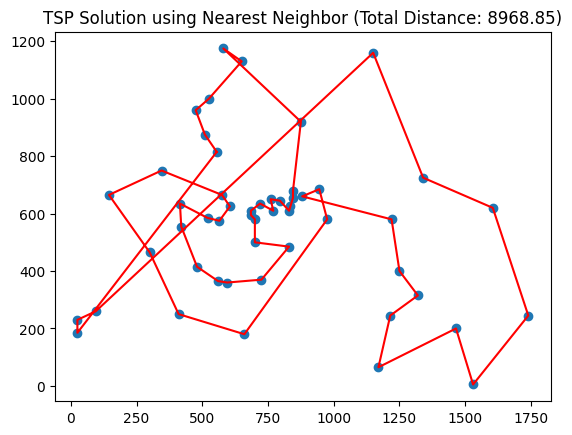

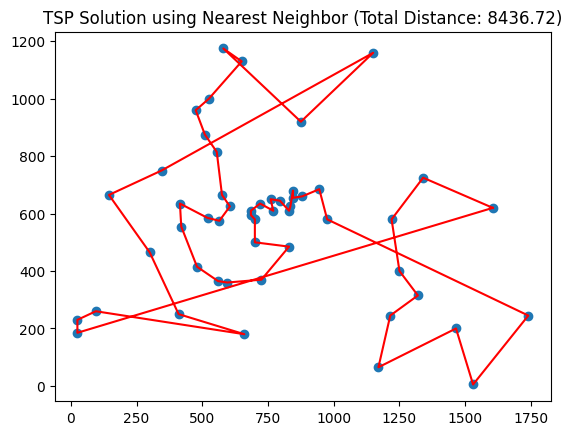

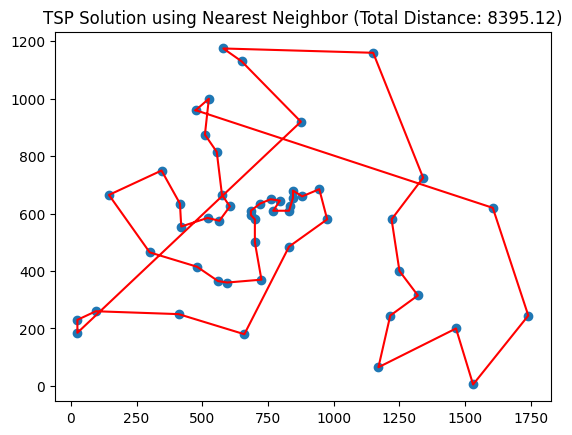

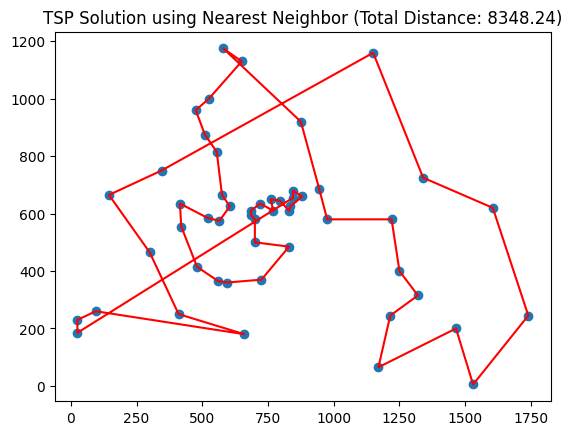

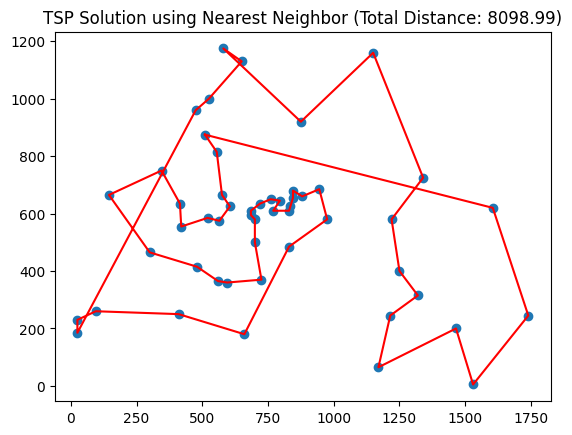

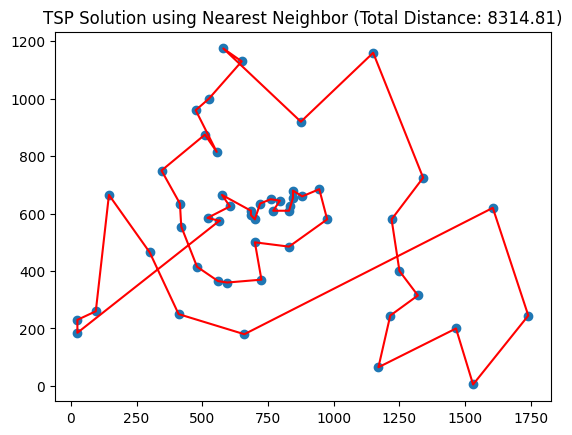

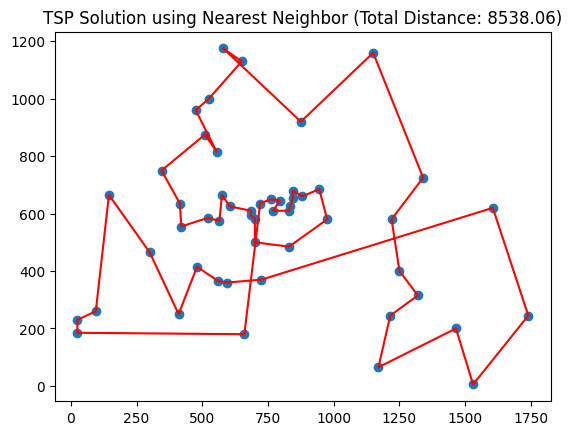

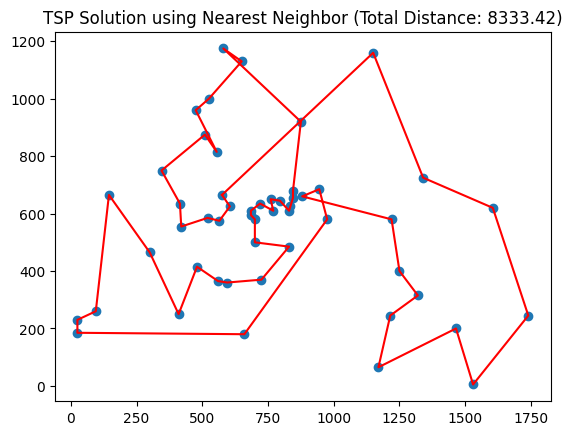

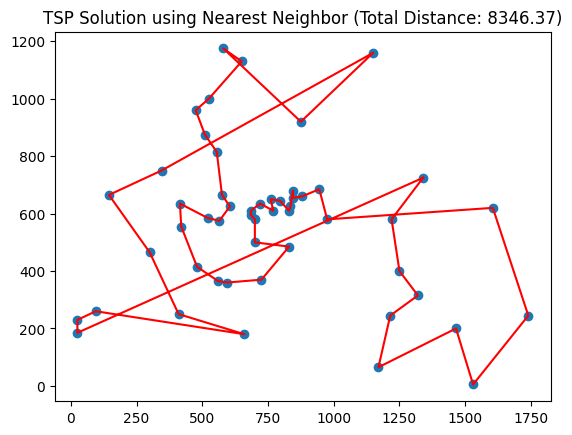

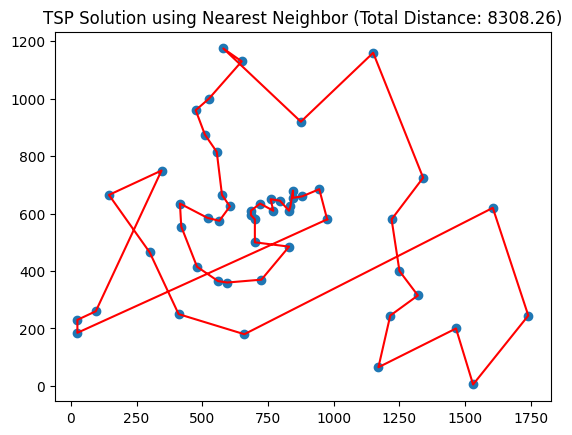

Average Tour Length: 8408.885287972676


In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates


# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "berlin52.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
for i in range(10):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


berlin52_NNHwith2OPT

Iteration 740: Improved total distance to 8079.49
Iteration 1232: Improved total distance to 8066.92
Iteration 1995: Improved total distance to 7968.91


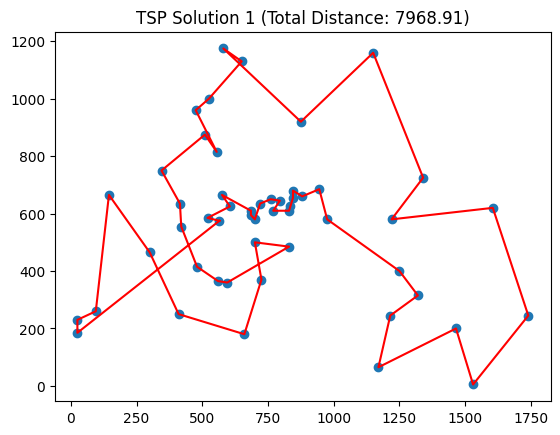

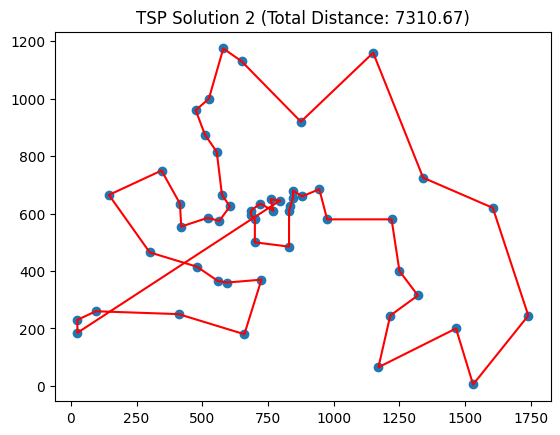

Iteration 25: Improved total distance to 8611.76
Iteration 47: Improved total distance to 8540.57
Iteration 50: Improved total distance to 8133.18
Iteration 169: Improved total distance to 8029.35
Iteration 173: Improved total distance to 7814.08
Iteration 196: Improved total distance to 7659.37
Iteration 1277: Improved total distance to 7614.56
Iteration 1326: Improved total distance to 7595.05


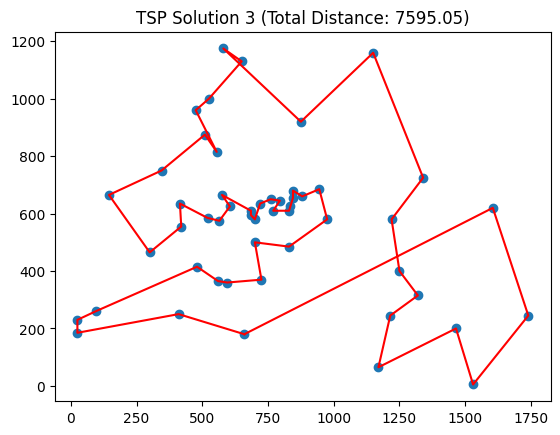

Iteration 47: Improved total distance to 8605.72
Iteration 457: Improved total distance to 8520.30
Iteration 591: Improved total distance to 8476.51
Iteration 593: Improved total distance to 8288.86
Iteration 601: Improved total distance to 8268.67
Iteration 603: Improved total distance to 8258.73
Iteration 677: Improved total distance to 8193.89
Iteration 972: Improved total distance to 8157.10
Iteration 996: Improved total distance to 8120.90
Iteration 1019: Improved total distance to 7948.65
Iteration 1041: Improved total distance to 7938.96
Iteration 1082: Improved total distance to 7899.31
Iteration 1101: Improved total distance to 7835.84
Iteration 1223: Improved total distance to 7813.31
Iteration 1772: Improved total distance to 7784.14
Iteration 2298: Improved total distance to 7686.02
Iteration 2496: Improved total distance to 7679.10


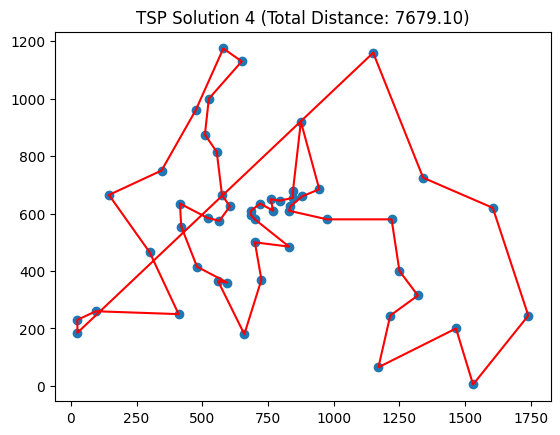

Iteration 1041: Improved total distance to 8075.79
Iteration 1062: Improved total distance to 8012.32
Iteration 1177: Improved total distance to 7936.14
Iteration 1184: Improved total distance to 7907.42
Iteration 2251: Improved total distance to 7809.31
Iteration 2324: Improved total distance to 7767.32
Iteration 2446: Improved total distance to 7747.81
Iteration 2447: Improved total distance to 7560.42
Iteration 3594: Improved total distance to 7522.83


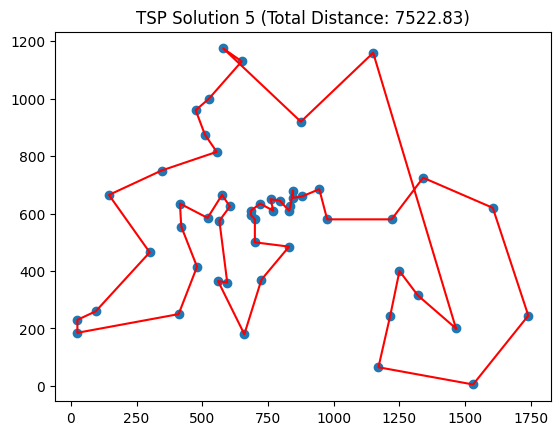

Average Tour Length: 7615.313409099583


In [21]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "berlin52.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []

# Rerun TSP solving process 5 times
for i in range(5):
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution {i+1} (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


berlin52_NNHwith3OPT

Iteration 185: Improved total distance to 8569.83
Iteration 9831: Improved total distance to 8236.55
Iteration 10788: Improved total distance to 8187.03
Iteration 13153: Improved total distance to 8168.20
Iteration 19595: Improved total distance to 8064.00


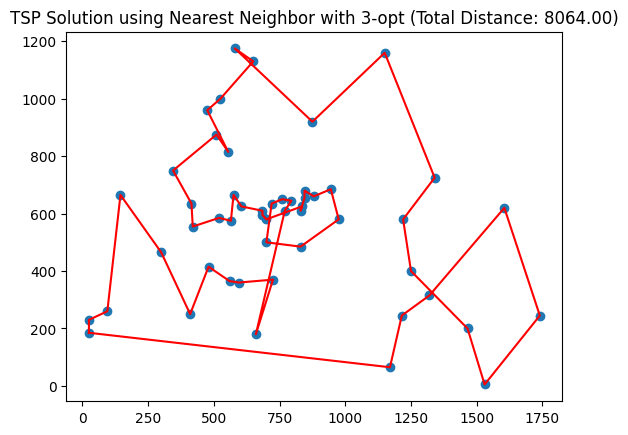

Iteration 738: Improved total distance to 8736.28
Iteration 953: Improved total distance to 8535.86
Iteration 1056: Improved total distance to 8532.60
Iteration 3718: Improved total distance to 8485.84
Iteration 3851: Improved total distance to 8482.36
Iteration 6408: Improved total distance to 8437.98
Iteration 6781: Improved total distance to 8021.82
Iteration 19640: Improved total distance to 7956.70


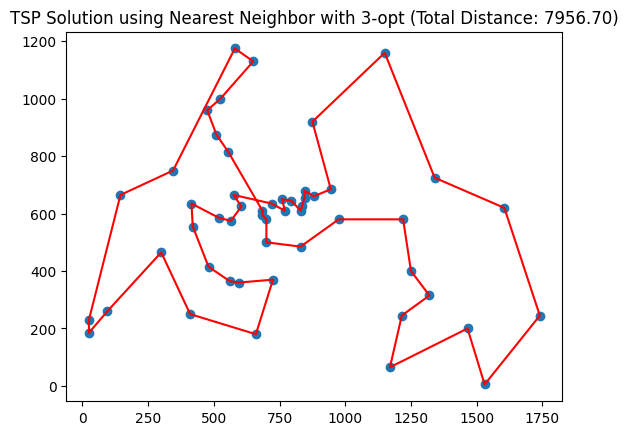

Iteration 385: Improved total distance to 8026.58
Iteration 38307: Improved total distance to 7968.69
Iteration 56645: Improved total distance to 7939.96
Iteration 76133: Improved total distance to 7899.08


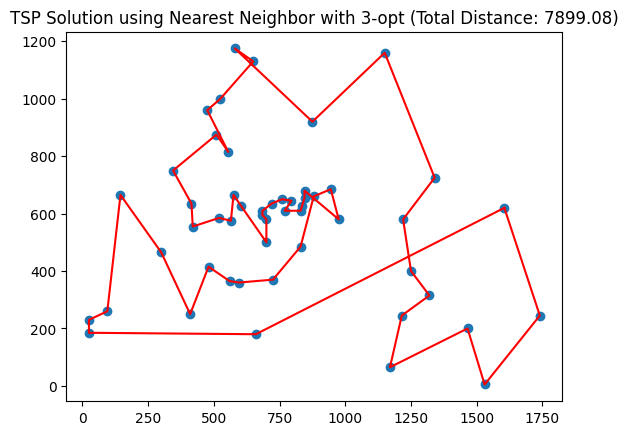

Average Tour Length: 7973.26


In [20]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "berlin52.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []

# Run the solver three times
for _ in range(3):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print the average total distance
average_distance = sum(total_distances) / len(total_distances)
print(f"Average Tour Length: {average_distance:.2f}")
